In [1]:
# Importa las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

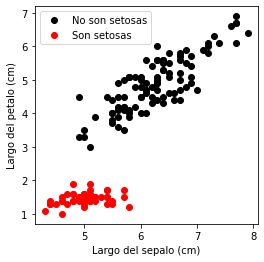

In [2]:
# Se importan los datos de las flores
# Las 0 y 1 son el length y width del sepal. Las 2 y 3 son length y width del petal. El 4 es la clase
datos = pd.read_csv('iris.data',header=None)

# Teniendo en la cuenta las condiciones del ejercicio ponemos la setosa como 1 y otro tipo como 0
Y=datos[4].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],[1,0,0])
x1=datos[0] # Largo del sepalo
x2=datos[1] # Ancho del sepalo
x3=datos[2] # Largo de los petalos
x4=datos[3] # Ancho de los petalos


# Hacemos las dos clases, las que son setosas y las que no
class_0 = Y==0 # No son 
class_1 = Y==1 # Si son

def grafica(x,y1,n):
    fig = plt.figure(figsize=(4,4))
    plt.plot(x[class_0],y1[class_0],'o',c='k',label='No son setosas')
    plt.plot(x[class_1],y1[class_1],'o',c='r',label='Son setosas')
    if n == 1:
          plt.plot(np.sort(x),y(np.sort(x)))
    plt.legend()
    plt.xlabel('Largo del sepalo (cm)')
    plt.ylabel('Largo del petalo (cm)')
    
grafica(x1,x3,0)


In [3]:
# Se definen las funciones para clasificar
def y(x):
    return -(b+w_1*x)/w_2
def act(z):
    return 1/(1+np.exp(-z))

Epoch [1/7],bias:-0.5 ,w1:-3.5 ,w2:-2.35 
Epoch [2/7],bias:0.0 ,w1:-2.0 ,w2:-3.3000000000000003 
Epoch [3/7],bias:0.5 ,w1:-0.5 ,w2:-4.250000000000001 
Epoch [4/7],bias:0.5 ,w1:-0.8000000000000003 ,w2:-5.300000000000001 
Epoch [5/7],bias:1.0 ,w1:1.7499999999999996 ,w2:-4.6000000000000005 
Epoch [6/7],bias:1.0 ,w1:1.7499999999999996 ,w2:-4.6000000000000005 
Epoch [7/7],bias:1.0 ,w1:1.7499999999999996 ,w2:-4.6000000000000005 


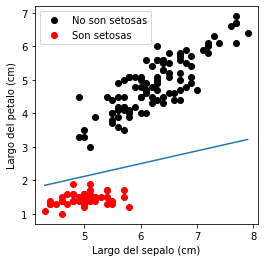

In [4]:
b = 0
w_1 = 0
w_2 = 0
n_epoch = 7
eta = 0.5


for epoch in range(n_epoch):
    for i,j,k in zip(x1,x3,Y):
        z = i*w_1+j*w_2+b
        sig_z = act(z)
        if sig_z>=0.5:
            out = 1
        if sig_z<0.5:
            out = 0
        error = k-out
        b = b + eta*error
        w_1 = w_1 + eta*error*i
        w_2 = w_2 + eta*error*j
    print('Epoch [{}/{}],bias:{} ,w1:{} ,w2:{} '.format(epoch+1,n_epoch,b,w_1,w_2))
grafica(x1,x3,1)
plt.show()

Acá se pudo categorizar entre las flores que son setosas o no dependiendo del largo del sepalo y de los petalos. Además, en las epocas se puede ver que desde la epoca 5 ya se encontró la separación entre las categorías. 

In [5]:
# Se toman los datos y se separan de acuerdo a la categoria
X=datos.drop(columns=4)
Y=datos[4].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],[0,1,2])
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [9]:
# Se hace una red con 2 capas
model_2 = MLPClassifier(activation='tanh',hidden_layer_sizes=(4,2), solver='adam',learning_rate_init=0.1)
model_2.fit(X_train,Y_train)
Y_pred_2 = model_2.predict(X_test)
accuracy_score(Y_test,Y_pred_2)

0.9736842105263158

In [12]:
# Se hace una red con 3 capas
model_3 = MLPClassifier(activation='tanh',hidden_layer_sizes=(4,2,4), solver='adam',learning_rate_init=0.1)
model_3.fit(X_train,Y_train)
Y_pred_3 = model_3.predict(X_test)
accuracy_score(Y_test,Y_pred_3)

0.9473684210526315

In [26]:
rep = []
for i in range(20):
    model_3 = MLPClassifier(activation='tanh',hidden_layer_sizes=(6,3,5), solver='adam',learning_rate_init=0.1)
    model_3.fit(X_train,Y_train)
    Y_pred_3 = model_3.predict(X_test)
    rep.append(round(accuracy_score(Y_test,Y_pred_3),1))
np.unique(rep,return_counts=True)

(array([0.3, 0.7, 0.8, 0.9, 1. ]), array([1, 2, 3, 5, 9]))

Al mirar la accuracy de los modelos, podemos darnos cuenta que se logra categorizar entre los tres tipos de plantas de una manera bastante exacta. Sin embargo, si este proceso se repite varias veces se puede ver que hay veces que el valor de ambas es cercano a 1, mientras que en otras circuntancias está al rededor del 0.3. Esto se puede deber principalmente a que es una base de datos pequeña y no se están tomando suficientes casos, o que los datos son cercanos entre ellos y no se logra categorizar de una manera adecuada los tipos de plantas. 